# [Metrics](#Sec:Metrics)
## [Classification metrics](#Sec:Classification)
- ### [Confusion Matrix](#Sec:ConfusionMatrix)
- ### [Accuracy](#Sec:Accuracy)
- ### [Precision](#Sec:Precision)
- ### [Recall](#Sec:Recall)
- ### [Precision-Recall trade-off](#Sec:Precision-Recall)
- ### [F1 Score](#Sec:F1Score)
- ### [Multi-Label Classification](#Sec:Multi-Label)
- ### [ROC AUC](#Sec:ROCAUC)

## [Regression metrics](#Sec:Classification)

- ### [Mean Squared Error](#Sec:MSE)
- ### [Root Mean Squared Error](#Sec:RMSE)
- ### [Mean Absolute Error](#Sec:MAE)
- ### [Differences among regression metrics](#Sec:Differences)

# [Cross-Validation](#Sec:CV)

- ### [K-Fold](#Sec:KFold)
- ### [Stratified K-Fold](#Sec:StratifiedKFold)
- ### [Trade-offs Between Cross-Validation and Train-Test Split](#Sec:Tradeoffs)
- ### [Grid Search CV](#Sec:GridSearchCV)
- ### [Randomized Search CV](#Sec:RandomizedSearchCV)



In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        print(cmap(idx))
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.6, 
                    color=cmap(idx),
                    edgecolor='black',
                    marker=markers[idx], 
                    label=cl,
                    s=55)

    # highlight test samples
    if test_idx:
        # plot all samples
        if not versiontuple(np.__version__) >= versiontuple('1.9.0'):
            X_test, y_test = X[list(test_idx), :], y[list(test_idx)]
            warnings.warn('Please update to NumPy 1.9.0 or newer')
        else:
            X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    color='',
                    alpha=1.0,
                    edgecolor='black',
                    linewidths=1,
                    marker='o',
                    s=55, label='test set')

<a id='Sec:Metrics'></a>

# The role of metrics

**Metrics** have a twofold role in machine learning.

- The metric applied to the training sample drives the learning process of the algorithm. While learning from data, the algorithm will evaluate different rules that can maximises the performances of the model in accomplishing a particular task.
- The metric applied to the test sample is used to evaluate the generalization error.

Different metrics will lead to different models.

The choice of the correct metric depends on the type of problem you want to solve and the type of data set you have at hand.

All metrics in scikit-learn can be found <a href="https://scikit-learn.org/stable/modules/model_evaluation.html">here</a>.



<a id='Sec:Classification'></a>

# Classification

Evaluating a classifier is often significantly trickier than evaluating a regressor.

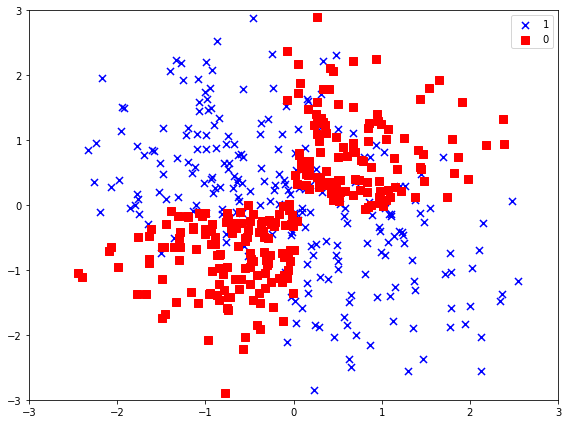

In [2]:
np.random.seed(0)
X_xor = np.random.randn(500, 2)
y_xor = np.logical_xor(X_xor[:, 0] > 0,
                       X_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, 0)

X_xor[y_xor == 0] = X_xor[y_xor == 0] + np.random.normal(0.0,0.1, size=(len(X_xor[y_xor == 0]),2))
X_xor[y_xor == 1] = X_xor[y_xor == 1] + np.random.normal(0.0,0.5, size=(len(X_xor[y_xor == 1]),2))

plt.figure(figsize=(8,6))
plt.scatter(X_xor[y_xor == 1, 0],
            X_xor[y_xor == 1, 1],
            c='b', marker='x',
            s=50,
            label='1')
plt.scatter(X_xor[y_xor == 0, 0],
            X_xor[y_xor == 0, 1],
            c='r',
            s=50,
            marker='s',
            label='0')

plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.legend(loc='best')
plt.tight_layout()


In [3]:
X_train, X_test, y_train, y_test = train_test_split(X_xor, y_xor, test_size=0.3)

(1.0, 0.0, 0.0, 1.0)
(0.0, 0.0, 1.0, 1.0)


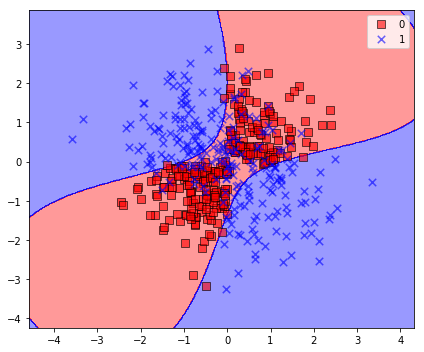

In [4]:
m = SVC(kernel='rbf', gamma=0.1, C=10, random_state=0, probability=True)
m.fit(X_train, y_train)

#m = RandomForestClassifier(n_estimators=100, max_depth=3)
#m.fit(X_train, y_train)

plt.figure(figsize=(6,5))
plt.subplot(111)
plot_decision_regions(X_xor, y_xor,classifier=m)
plt.tight_layout()
plt.legend()


<a id='Sec:ConfusionMatrix'></a>
### Confusion matrix

A confusion matrix is a table that is often used to describe the performance of a classification model (or "classifier") on a set of test data for which the true values are known. 

Each row in a confusion matrix represents an actual class, while each column represents a predicted class.

![](https://dl.dropboxusercontent.com/s/gez4jpt5hm3uo8t/confusion_matrix.png?dl=0)



In [6]:
m.classes_

array([0, 1])

In [7]:
from sklearn.metrics import confusion_matrix


print("")
print("Simply counting stars")
print(confusion_matrix(y_test, m.predict(X_test), normalize=None))

print("")
print("N stars/ All stars of that class")
print(confusion_matrix(y_test, m.predict(X_test), normalize='true'))

print("")
print("N stars/ All stars predicted to belong to that class")
print(confusion_matrix(y_test, m.predict(X_test), normalize='pred'))

print("")
print("N stars/ All stars")
print(confusion_matrix(y_test, m.predict(X_test), normalize='all'))




Simply counting stars
[[72  1]
 [21 56]]

N stars/ All stars of that class
[[0.98630137 0.01369863]
 [0.27272727 0.72727273]]

N stars/ All stars predicted to belong to that class
[[0.77419355 0.01754386]
 [0.22580645 0.98245614]]

N stars/ All stars
[[0.48       0.00666667]
 [0.14       0.37333333]]


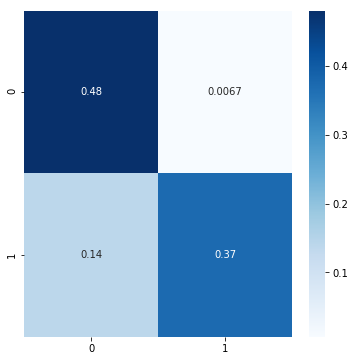

In [8]:
import seaborn as sns
plt.figure(figsize=(6,6))
sns.heatmap(confusion_matrix(y_test, m.predict(X_test), normalize='all'), cmap='Blues', annot=True)

Results on the diagonal are good, results off the diagonal are bad, and finding where those off-diagonal results tend to occur will help us understand where our errors are and how we can improve on them.

In this case we see that our false negative rate is significantly higher relative to our false positive rate. Perhaps (at least with more complicated data!) we should investigate what errors we are making in those misclassifications.

The False Negatives are more than the False Positive. Why?

- Unbalanced datasets (bad, you need to do something about it)
- Positive instances are more noisy than the Negative instances (bad? can you do something about it?)
- Positive are more instrinsically scattered than the Negative instances (you can't do much about it, I guess...)

(1.0, 0.0, 0.0, 1.0)
(0.0, 0.0, 1.0, 1.0)


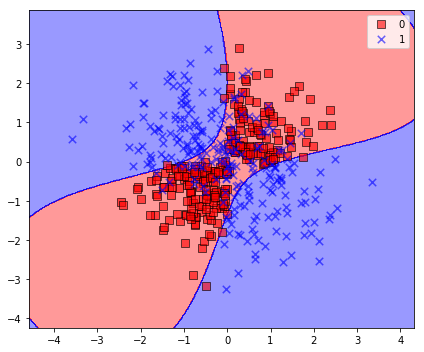

In [9]:
plt.figure(figsize=(6,5))
plt.subplot(111)
plot_decision_regions(X_xor, y_xor,classifier=m)
plt.tight_layout()
plt.legend()


The confusion matrix gives you a lot of information, but sometimes you may prefer a more concise metric.

<a id='Sec:Accuracy'></a>
### Accuracy

The **accuracy** is the proportion of predictions which are made correctly. 

$\Large Accuracy = \frac{TN + TP}{TN + FN + TP + FP}$

<img src="https://dl.dropboxusercontent.com/s/hy0wfzcpcppebzk/accuracy.png?dl=0" width="500">

Accuracy is not very useful for diagnosing a classifier because it doesn't tell us *where* the model is making errors. Answering this "where" question is an essential part of model-building. Hence accuracy is a start, but not an end.

In [10]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,m.predict(X_test))

0.8533333333333334

QUESTION 1

<a id='Sec:Precision'></a>
### Precision

**Precision** is defined as the number of true positives divided by the number of true positives plus the number of false positives.

Precision is a good measure to determine when the costs of False Positive is high.

$\Large Precision = \frac{TP}{TP + FP}$

<img src="https://dl.dropboxusercontent.com/s/f9que4sqtn43iff/precision.png?dl=0" width="500">

A trivial way to have perfect precision is to make one single positive prediction and ensure it is correct (precision = 1/1 = 100%). This would not be very useful since the classifier would ignore all but one positive instance. So precision is typically used along with another metric named recall.

In [11]:
from sklearn.metrics import precision_score
precision_score(y_test,m.predict(X_test))

0.9824561403508771

<a id='Sec:Recall'></a>
### Recall (or sensitivity)

When it is actually the positive result, how often does it predict correctly.

Recall is a good measure to determine when the costs of False Negative is high.

$\Large Recall = \frac{TP}{TP + FN}$


<img src="https://dl.dropboxusercontent.com/s/9eityy1cbc78qqp/recall.png?dl=0" width="500">



In [12]:
from sklearn.metrics import recall_score
recall_score(y_test,m.predict(X_test))

0.7272727272727273

QUESTION 3

QUESTION 5

QUESTION 7

<a id='Sec:Precision-Recall'></a>
### Precision-Recall trade-off

Suppose that we are running a search engine. 
Our search engine returns 30 pages: 

- 20 are relevant
- 10 are irrelevant. 

Our search engine also fails to return 40 other relevant pages.

In this toy example: 

- Precision is the percentage of results we've returned which are relevant: 20/30, or 2/3. 
- Recall (the "completeness" of the information we've returned with respect to all possible relevant) results: 20/60, or 1/3.

Precision and recall are fundamentally a **trade-off**. Returning *all* of the relevant results naturally requires returning at least *some* edge cases that turn out to be useless, and returning *only* relevant results naturally requires excluding *some* edge cases that turn out to be useful.

Unfortunately, you can’t have both precision and recall high. If you increase precision, it will reduce recall, and vice versa. This is called the **precision/recall tradeoff**.


<a id='Sec:F1Score'></a>
### F1 score

There are also a lot of situations where both precision and recall are equally important. 

F1 Score is the <a href="https://stackoverflow.com/questions/26355942/why-is-the-f-measure-a-harmonic-mean-and-not-an-arithmetic-mean-of-the-precision">**harmonic**</a> average of Precision and Recall. Therefore, this score takes both false positives and false negatives into account. Intuitively it is not as easy to understand as accuracy, but F1 is usually more useful than accuracy, especially if you have an uneven class distribution.

$\Large F1 = \frac{2 * Recall * Precision}{Recall + Precision}$

The harmonic mean discourages hugely unequal values and extremely low values. We would want F1-score to give a reasonably low score when either precision or recall is low.


In [13]:
from sklearn.metrics import f1_score
print(f1_score(y_test, m.predict(X_test)))

0.835820895522388


<a id='Sec:Multi-Label'></a>
### Multi-Label Classification

These formulae can be used with only the Binary Classification problem.

When you have more than two classes, the scores for each class are returned. Then you can average them if you are interested in a unique parameter.

<a id='Sec:ROCAUC'></a>
### Area Under the Receiver Operating Characteristic Curve (ROC AUC) 

There are more obvious true positives and less obvious true positivies.



(1.0, 0.0, 0.0, 1.0)
(0.0, 0.0, 1.0, 1.0)


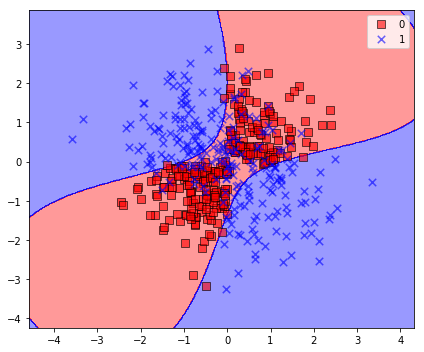

In [14]:
plt.figure(figsize=(6,5))
plt.subplot(111)
plot_decision_regions(X_xor, y_xor,classifier=m)
plt.tight_layout()
plt.legend()


In [44]:
# Deriving probabilities of being positive
prob_1 = m.predict_proba(X_test).T[1]

# Sorting the probabilities and the actual classes
inds = prob_1.argsort()
sorted_prob_1 = prob_1[inds]
sorted_y = y_test[inds]

# Plotting the sorted probabilities and the actual classes
for i in range(len(sorted_prob_1)):
    prob = sorted_prob_1[i]
    print(r"P_1={}; truth: {}".format(round(prob,12),sorted_y[i]))


P_1=0.002446252736; truth: 0
P_1=0.004133282297; truth: 0
P_1=0.008272995401; truth: 0
P_1=0.009033362075; truth: 0
P_1=0.015830902239; truth: 0
P_1=0.016239264112; truth: 0
P_1=0.021632390408; truth: 0
P_1=0.026088683628; truth: 0
P_1=0.026605617469; truth: 1
P_1=0.027045211049; truth: 0
P_1=0.02946690676; truth: 0
P_1=0.030223207346; truth: 0
P_1=0.036001893282; truth: 0
P_1=0.040326634319; truth: 0
P_1=0.040757198662; truth: 0
P_1=0.046949955064; truth: 0
P_1=0.05293815151; truth: 0
P_1=0.055638249613; truth: 1
P_1=0.060119686264; truth: 0
P_1=0.061772397708; truth: 0
P_1=0.068599612535; truth: 0
P_1=0.073500506273; truth: 0
P_1=0.077067682205; truth: 0
P_1=0.078825221599; truth: 1
P_1=0.079311127788; truth: 0
P_1=0.080579897997; truth: 0
P_1=0.086967013943; truth: 0
P_1=0.101564914794; truth: 0
P_1=0.106319644691; truth: 0
P_1=0.108536587516; truth: 0
P_1=0.113330751589; truth: 0
P_1=0.117092362603; truth: 1
P_1=0.11801096052; truth: 0
P_1=0.12563417045; truth: 0
P_1=0.126385276991

To get the most obvious true positives, the model does not have to work very hard. However, the model's confidence in each of the results that we collect afterwards drops steadily. The last few results will naturally be the hardest to squeeze out; they will involve making the largest number of errors (picking up the most false positives).

One can get different treshold probabilities and for each one calculate the 

- $ \Large True Positive Rate = \Large Recall = \frac{TP}{TP + FN}$

- $ \Large False Positive Rate =\frac{FP}{TN + FP}$

And then plot the first as a function of the second.

In [46]:
1/(1+77-1)

0.012987012987012988

In [60]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, m.predict_proba(X_test)[:,1])


- **fps** :: Increasing false positive rates such that element i is the false positive rate of predictions with score >= thresholds[i].
- **tpr** :: Increasing true positive rates such that element i is the true positive rate of predictions with score >= thresholds[i].
- **thresholds** :: Decreasing thresholds on the decision function used to compute fpr and tpr. thresholds[0] represents no instances being predicted and is arbitrarily set to max(y_score) + 1.


In [61]:
print("thresholds: {}".format(thresholds))
print("fpr: {}".format(fpr))
print("tpr: {}".format(tpr))

thresholds: [2.         1.         0.86205133 0.84336258 0.69419004 0.64238442
 0.5864757  0.48925932 0.45345377 0.38616771 0.37198849 0.35893746
 0.35213748 0.34070708 0.34042358 0.33680657 0.33639887 0.29440942
 0.29311547 0.26775104 0.23290481 0.22748827 0.22250769 0.21375574
 0.20631366 0.19556724 0.17120823 0.11801096 0.11709236 0.07931113
 0.07882522 0.06011969 0.05563825 0.02704521 0.02660562 0.00244625]
fpr: [0.         0.         0.         0.01369863 0.01369863 0.02739726
 0.02739726 0.05479452 0.05479452 0.09589041 0.09589041 0.10958904
 0.10958904 0.1369863  0.1369863  0.19178082 0.19178082 0.23287671
 0.23287671 0.36986301 0.36986301 0.38356164 0.38356164 0.45205479
 0.45205479 0.50684932 0.50684932 0.61643836 0.61643836 0.71232877
 0.71232877 0.78082192 0.78082192 0.89041096 0.89041096 1.        ]
tpr: [0.         0.01298701 0.61038961 0.61038961 0.72727273 0.72727273
 0.77922078 0.77922078 0.83116883 0.83116883 0.84415584 0.84415584
 0.85714286 0.85714286 0.87012987 0.87

In [62]:
total_true_positive = len(y_test[y_test == 1])

tr = thresholds[3]
print('Threshold: {}'.format(tr))
TP = sum(y_test[prob_1 >= tr])
FN = total_true_positive-TP
TPR = TP/(TP+FN)
print('tpr: {}'.format(TPR))
FP = len(y_test[prob_1 >= tr]) - sum(y_test[prob_1 >= tr])
TN = len(y_test[prob_1 < tr]) - sum(y_test[prob_1 < tr])
FPR = FP/(FP+TN)
print('fpr: {}'.format(FPR))


Threshold: 0.8433625806160284
tpr: 0.6103896103896104
fpr: 0.0136986301369863


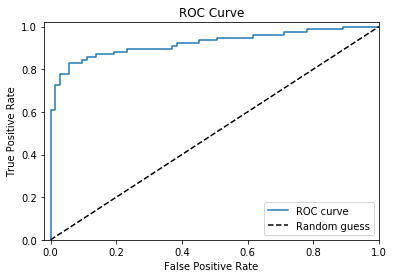

In [63]:
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.xlim([-0.02, 1])
plt.ylim([0, 1.02])
plt.legend(loc="lower right")

By looking a different points on the ROC curve, we can diagnose how much confidence the model has in different parts of the data. For example, if the ROC curve for the first quartile is extremely steep, then we see that the model "clears" the first 80% of true positives very easily. Seeing where the model begins to "fall off" is often very informative, because it's those records that we can often make most progress accuracy on (and hardly ever more marginal records further down the curve!).

AUC - ROC curve is a performance measurement for classification problem at various thresholds settings. ROC is a probability curve and AUC represents degree or measure of separability. It tells how much model is capable of distinguishing between classes. Higher the AUC, better the model is at predicting 0s as 0s and 1s as 1s. By analogy, Higher the AUC, better the model is at distinguishing between patients with disease and no disease.


In [64]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, m.predict_proba(X_test)[:,1])

0.9229674435153887

QUESTION 9

<a id='Sec:Regression'></a>
# Regression


<a id='Sec:MSE'></a>
## Mean squared error MSE

Mean Squared Error represents the average of the squared difference between the original and predicted values in the data set. It measures the variance of the residuals.

<img src="https://dl.dropboxusercontent.com/s/kniteqhslbgxuth/MSE.png?dl=0" width="700">



<a id='Sec:RMSE'></a>
## Root Mean squared error RMSE

It is the root of the MSE. It brings the same information of the MSE.

However, RMSE is more used than MSE to evaluate the performance of the regression model with other random models as it has the same units as the dependent variable (Y-axis).


<img src="https://dl.dropboxusercontent.com/s/aedjkmhxsr02m0x/RMSE.png?dl=0" width="400">



<a id='Sec:MAE'></a>
## Mean Absolute Error

The Mean absolute error represents the average of the absolute difference between the actual and predicted values in the dataset. It measures the average of the residuals in the dataset.


<img src="https://dl.dropboxusercontent.com/s/zs20vxbqxm8f6jf/MAE.png?dl=0" width="500">




<a id='Sec:Differences'></a>
## Differences among regression metrics

- The lower value of MAE, MSE, and RMSE implies higher accuracy of a regression model.

- Mean Squared Error (MSE) and Root Mean Square Error penalizes the large prediction errors.

- MAE does not penalizes penalizes large prediction errors, so it is more robust to data with outliers.

- MSE is a differentiable function that makes it easy to perform mathematical operations in comparison to a non-differentiable function like MAE.

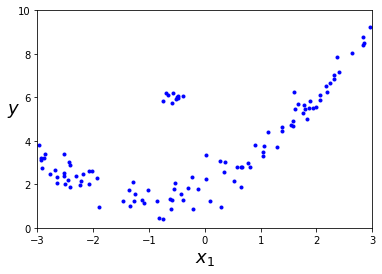

In [65]:
m=100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)*0.5
X = np.concatenate([X,np.random.normal(-0.5,0.1,size=(10,1))])
y = np.concatenate([y,np.random.normal(6,0.1,size=(10,1))]).ravel()

plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

In [66]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

# Define the model. SVR depends on two hypermaprameters (C, gamma)
svr = SVR(kernel="rbf", C=10, gamma=0.1)

# I search for the best hyperparameters that minimize the metric (MAE, MSE)
param_grid={"C": [1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3], "gamma": [1e-2, 1e-1, 1e0, 1e1, 1e2]}

svr_mae = GridSearchCV(svr,param_grid, cv=5, scoring='neg_mean_absolute_error')
svr_mae.fit(X, y)

svr_mse = GridSearchCV(svr,param_grid, cv=5, scoring='neg_mean_squared_error')
svr_mse.fit(X, y)


GridSearchCV(cv=5, estimator=SVR(C=10, gamma=0.1),
             param_grid={'C': [0.01, 0.1, 1.0, 10.0, 100.0, 1000.0],
                         'gamma': [0.01, 0.1, 1.0, 10.0, 100.0]},
             scoring='neg_mean_squared_error')

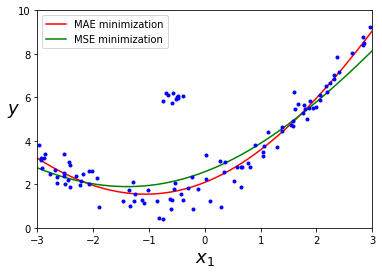

In [67]:
X_plot = np.linspace(-3, 3, 100000)[:, None]
y_svr_mae = svr_mae.predict(X_plot)
y_svr_mse = svr_mse.predict(X_plot)

plt.plot(X_plot,y_svr_mae, 'r-', label='MAE minimization')
plt.plot(X_plot,y_svr_mse, 'g-', label='MSE minimization')
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.legend()
plt.show()

QUESTION 12

<a id='Sec:CV'></a>
# Cross-Validation

One way to evaluate a model would be to use the **train_test_split** function to split the training set into a smaller training set and a test set, then train your models against the smaller training set and evaluate them against the test set.

<img src="https://miro.medium.com/max/600/1*n2OWaxMuMcbBkJ31_Zckxg.png">

However sometimes all this can lead to bias, because you always use the same instances to train the model and the same instances to test it. What happens if your test set is small and it is not well representative of the real world?

It would be much better if you could use all the instances you have at hand to train the model and all the instances to test it. 

Of course a single instance must be part either of the training set or the test set. It cannot be part of both of them!

SOLUTION: **cross-validation**

<a id='Sec:KFold'></a>
### KFold

In **K Fold cross validation**, the data is divided into k subsets. Now the holdout method is repeated k times, such that each time, one of the k subsets is used as the test set and the other k-1 subsets are put together to form a training set. The generalisation error is averaged over all k trials to get total effectiveness of our model. As can be seen, every data point gets to be in a validation set exactly once, and gets to be in a training set k-1 times. 

This significantly reduces bias as we are using most of the data for fitting, and also significantly reduces variance as most of the data is also being used in test set.

<img src="https://dl.dropboxusercontent.com/s/glqeb6tq85ln95a/KFold.png?dl=0" width="700">



In [68]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

# define the model
m = SVC(kernel='rbf', gamma=0.1, C=10, random_state=0, probability=True)

# define the number of K folds
n_fold = 5

# define the KFold function
folds = KFold(n_splits=n_fold, shuffle=True)

# calculate the cross validation scores (note that I am not using training/test sets anymore)
results = cross_val_score(m, X_xor, y_xor, cv=folds, scoring='f1')
print("All {} scores derived though CV: {}".format(n_fold, results))
print("Mean of all scores: {}".format(np.mean(results)))
print("Standard deviation of all scores: {}".format(np.std(results)))

All 5 scores derived though CV: [0.86046512 0.74074074 0.71794872 0.80487805 0.79487179]
Mean of all scores: 0.7837808837241621
Standard deviation of all scores: 0.050269072330315835


<a id='Sec:StratifiedKFold'></a>
## StratifiedKFold

A slight variation in the K Fold cross validation technique is made, such that each fold contains approximately the same percentage of samples of each target class as the complete set, or in case of prediction problems, the mean response value is approximately equal in all the folds. This variation is also known as **Stratified K Fold**.

In [69]:
from sklearn.model_selection import StratifiedKFold

# define the number of K folds
n_fold = 5

# define the StratifiedKFold function
folds = StratifiedKFold(n_splits=n_fold, shuffle=True)

# calculate the cross validation scores
results = cross_val_score(m, X_xor, y_xor, cv=folds, scoring='f1')
print("All {} scores derived though CV: {}".format(n_fold, results))
print("Mean of all scores: {}".format(np.mean(results)))
print("Standard deviation of all scores: {}".format(np.std(results)))

All 5 scores derived though CV: [0.79012346 0.76190476 0.69230769 0.71794872 0.8988764 ]
Mean of all scores: 0.7722322066891356
Standard deviation of all scores: 0.07183332225732748


<a id='Sec:Tradeoffs'></a>

## Trade-offs Between Cross-Validation and Train-Test Split

Cross-validation gives a more accurate measure of model quality, which is especially important when you have small data sets. However, it can take more time to run, because it estimates models once for each fold. So it is doing more total work.

Given these tradeoffs, when should you use each approach? On small datasets, the extra computational burden of running cross-validation isn't a big deal. These are also the problems where model quality scores would be least reliable with train-test split. So, if your dataset is smaller, you should run cross-validation.

For the same reasons, a simple train-test split is sufficient for larger datasets. It will run faster, and you may have enough data that there's little need to re-use some of it for holdout.

There's no simple threshold for what constitutes a large vs small dataset. If your model takes a couple minute or less to run, it's probably worth switching to cross-validation. If your model takes much longer to run, cross-validation may slow down your workflow more than it's worth.

Alternatively, you can run cross-validation and see if the scores for each experiment seem close. If each experiment gives the same results, train-test split is probably sufficient.



<a id='Sec:GridSearchCV'></a>
## Grid Search CV

The performance of a model significantly depends on the value of hyperparameters. 

Note that there is no way to know in advance the best values for hyperparameters so ideally, we need to try all possible values to know the optimal values. Doing this manually could take a considerable amount of time and resources and thus we use <a href="https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html">GridSearchCV</a> to automate the tuning of hyperparameters.



(1.0, 0.0, 0.0, 1.0)
(0.0, 0.0, 1.0, 1.0)


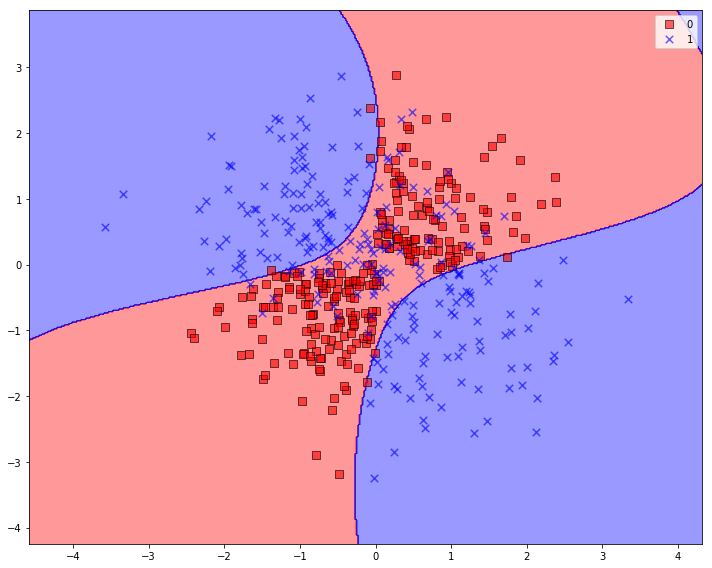

In [70]:
m = SVC(kernel='rbf', gamma=0.1, C=10)
m.fit(X_xor, y_xor)

plt.figure(figsize=(10,8))
plot_decision_regions(X_xor, y_xor,classifier=m)
plt.tight_layout()
plt.legend()


In [71]:
from sklearn.model_selection import GridSearchCV

#We pass predefined values for hyperparameters to the GridSearchCV function. 
#We do this by defining a dictionary in which we mention a particular hyperparameter 
#along with the values it can take.
parameters = {'kernel':['rbf'], 'gamma':[0.05, 0.1,0.2, 0.3], 'C':[1, 10, 100, 200, 300]}

#clf = GridSearchCV(m, parameters, cv=5, scoring='f1', verbose=True)
clf = GridSearchCV(m, parameters, cv=5, scoring='f1', verbose=True)
#clf = GridSearchCV(m, parameters, cv=5, scoring='recall', verbose=True)
clf.fit(X_xor, y_xor)

print("The best hyperarameters: {}".format(clf.best_params_))
print("The final score: {}".format(clf.best_score_))


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


The best hyperarameters: {'C': 100, 'gamma': 0.2, 'kernel': 'rbf'}
The final score: 0.8184653151508826


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.6s finished


(1.0, 0.0, 0.0, 1.0)
(0.0, 0.0, 1.0, 1.0)


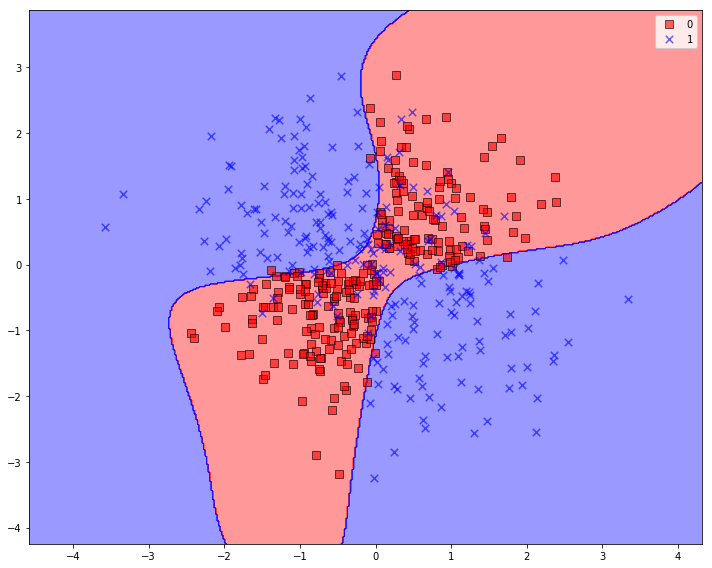

In [72]:
#clf.set_params(refit=True).fit(X_xor, y_xor)

plt.figure(figsize=(10,8))
plot_decision_regions(X_xor, y_xor,classifier=clf)
plt.tight_layout()
plt.legend()


<a id='Sec:RandomizedSearchCV'></a>
## Randomized Search CV

The <a href="https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html#sklearn.model_selection.RandomizedSearchCV">RandomizedSearchCV</a> function is similar to GridSeachCV, but instead of defining a grid of parameters that have to be tested, we define the distributions from which we will randomply draw the parameters to test.

You can choose from <a href="https://docs.scipy.org/doc/scipy/reference/stats.html">these distributions</a>.


In [73]:
from sklearn.model_selection import RandomizedSearchCV
import scipy.stats as stats

parameters = {'kernel':['rbf'], 'gamma':stats.uniform(0.01, 0.5), 'C':stats.uniform(10,200)}
#parameters = {'kernel':['rbf'], 'gamma':stats.norm(0.2, 0.1), 'C':stats.uniform(10,200)}

clf = RandomizedSearchCV(m, parameters, cv=5, scoring='f1', verbose=True, n_iter=50)
clf.fit(X_xor, y_xor)

print("The best hyperarameters: {}".format(clf.best_params_))
print("The final score: {}".format(clf.best_score_))


Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


The best hyperarameters: {'C': 45.449972269889884, 'gamma': 0.22274759882022332, 'kernel': 'rbf'}
The final score: 0.8279143860039083


[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:    1.4s finished


(1.0, 0.0, 0.0, 1.0)
(0.0, 0.0, 1.0, 1.0)


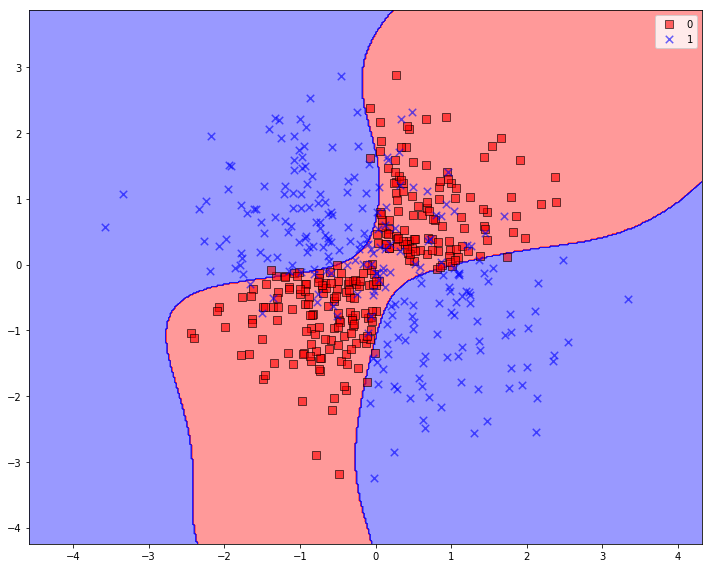

In [74]:
plt.figure(figsize=(10,8))
plot_decision_regions(X_xor, y_xor,classifier=clf)
plt.tight_layout()
plt.legend()
